In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Replace by your METAR reports from https://mesonet.agron.iastate.edu/
# Read data from csv
metars = pd.read_csv('/content/LFRS.csv')

metars['valid'] = pd.to_datetime(metars['valid'])

# Extract day month and hour from the 'valid' column
metars['day'] = metars['valid'].dt.date
metars['hour'] = metars['valid'].dt.hour
metars['month'] = metars['valid'].dt.month


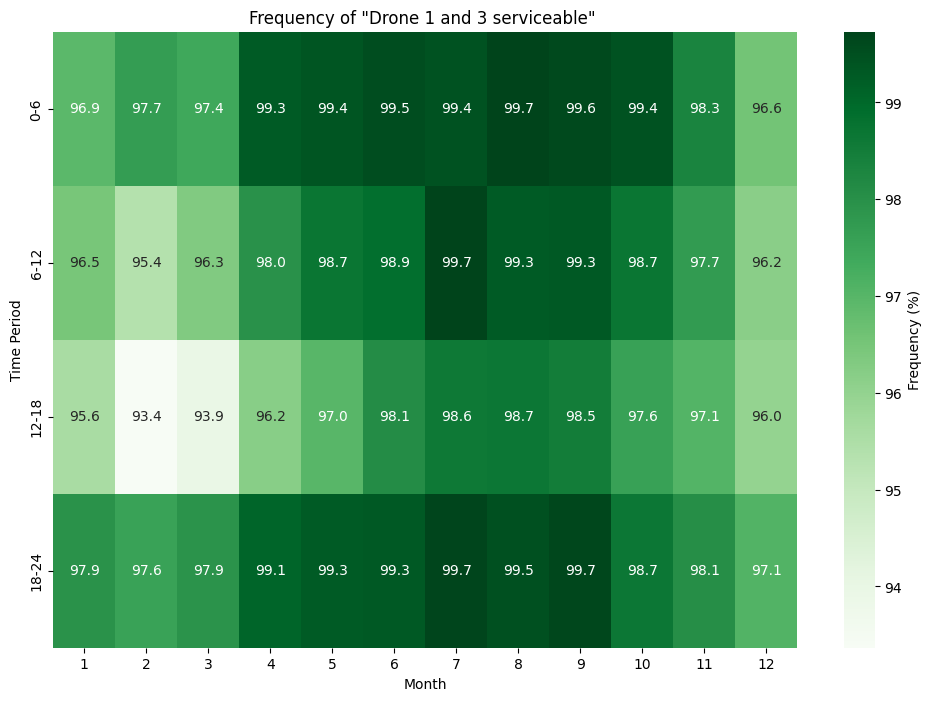

In [6]:
# Define time periods
def get_time_period(hour):
    if 0 <= hour < 6:
        return '0-6'
    elif 6 <= hour < 12:
        return '6-12'
    elif 12 <= hour < 18:
        return '12-18'
    else:
        return '18-24'

metars['time_period'] = metars['hour'].apply(get_time_period)

# Convert 'time_period' to a categorical type with the correct order
time_period_order = ['0-6', '6-12', '12-18', '18-24']
metars['time_period'] = pd.Categorical(metars['time_period'], categories=time_period_order, ordered=True)


# Determine if sknt and gust are less than 20
metars['below_20'] = metars[['sknt', 'gust']].apply(pd.to_numeric, errors='coerce').max(axis=1) < 20

# Group by month and time period to calculate the frequency of below_20 days
frequency_table = metars.groupby(['month', 'time_period'])['below_20'].mean().reset_index()
frequency_table['frequency'] = frequency_table['below_20'] * 100


pivot_table = frequency_table.pivot(index='time_period', columns='month', values='frequency')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Greens", ax=ax, cbar_kws={'label': 'Frequency (%)'})

# Setting labels and title
#ax.set_title('Frequency of reports with wind speed and gust < 10 m.s$^{-1}$')
ax.set_title('Frequency of "Drone 1 and 3 serviceable" ')
ax.set_xlabel('Month')
ax.set_ylabel('Time Period')

# Display the plot
plt.savefig('Heat_Drone1_and_3.png')
plt.savefig('Heat_Drone1_and_3.png')
plt.show()